# **Q1. Web Scraping with BeautifulSoup**

In [155]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [156]:
url = 'https://books.toscrape.com/'
response = requests.get(url)

soup = BeautifulSoup(response.text,'html.parser')
books = soup.find_all('article', class_='product_pod')

data = []

for _ in books[:10]:
  title = _.h3.a['title']
  price = _.find('p',class_='price_color').text.strip()
  print(f"Title:{title}\n Price:{price}\n")
  data.append({"Title":title,"Price":price})

df = pd.DataFrame(data)
df.to_csv('books.csv')
print("data saved to book.csv")


Title:A Light in the Attic
 Price:Â£51.77

Title:Tipping the Velvet
 Price:Â£53.74

Title:Soumission
 Price:Â£50.10

Title:Sharp Objects
 Price:Â£47.82

Title:Sapiens: A Brief History of Humankind
 Price:Â£54.23

Title:The Requiem Red
 Price:Â£22.65

Title:The Dirty Little Secrets of Getting Your Dream Job
 Price:Â£33.34

Title:The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
 Price:Â£17.93

Title:The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
 Price:Â£22.60

Title:The Black Maria
 Price:Â£52.15

data saved to book.csv


# **Q2: API-Based News Collection**

In [149]:
import requests
import json

In [150]:
api_key = "1cd71b964e9b4e7ea27d6ffd4e1f2700"

# "https://newsapi.org/v2/top-headlines?country=in&Category=technology&apiKey=1cd71b964e9b4e7ea27d6ffd4e1f2700"

url = (
    "https://newsapi.org/v2/top-headlines?"
    "country=us&"
    "category=technology&"
    "pageSize=10&"
    f"apiKey={api_key}"
)

response = requests.get(url)
response.raise_for_status()
news_data = response.json()

articles = news_data.get('articles', [])

data = []

for _ in articles:
  title = _.get('title')
  source = _.get('source',{}).get('name')
  published_at = _.get('publishedAt')

  print(f"Title:{title}")
  print(f"Source:{source}")
  print(f"Published At:{published_at}")

  data.append({
      "Title":title,
      "Source":source,
      "Published At":published_at
  })

Title:The unbearable obviousness of AI fitness summaries - The Verge
Source:The Verge
Published At:2025-06-29T14:00:00Z
Title:Amazon Is Going Nuts, Mac Mini Rival (Windows 11 Pro, 1TB SSD, 32GB RAM) Now Costs Peanuts - Gizmodo
Source:Gizmodo.com
Published At:2025-06-29T12:10:22Z
Title:12 Things You Should Never Store in an Outdoor Shed - Real Simple
Source:Real Simple
Published At:2025-06-29T11:02:00Z
Title:A neural brain implant provides near instantaneous speech - Ars Technica
Source:Ars Technica
Published At:2025-06-29T11:00:58Z
Title:Student Solves a Long-Standing Problem About the Limits of Addition - WIRED
Source:Wired
Published At:2025-06-29T11:00:00Z
Title:Direct Injection Engines: Why Carbon Buildup Happens (And How To Prevent It) - Jalopnik
Source:Jalopnik
Published At:2025-06-29T09:25:00Z
Title:Cyberpunk 2077 massive multiplayer update leaves fans floored - GAMINGbible
Source:Gamingbible.com
Published At:2025-06-29T08:49:04Z
Title:Google Confirms Upgrade Choice For 2 Billion

In [151]:
file_name = "news.json"
with open(file_name,'w') as f:
  json.dump(data,f)

print(f"data saved to {file_name}")

data saved to news.json


# **Q3: Weather Data Collection**

In [152]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
api_key = "0af8551aa4485e6cc428ce2ded74c849"

# List of Indian cities
cities = ['Delhi', 'Leh', 'Srinagar', 'Jammu', 'Punjab']

url = "http://api.openweathermap.org/data/2.5/weather"

# Collect weather data
weather_data = []

for city in cities:
    try:
        params = {
            'q': city,
            'appid': api_key,
            'units': 'metric'
        }
        response = requests.get(url, params=params)
        response.raise_for_status()

        data = response.json()

        city_name = data['name']
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        condition = data['weather'][0]['description']

        weather_data.append({
            'City': city_name,
            'Temperature (°C)': temp,
            'Humidity (%)': humidity,
            'Condition': condition.title()
        })

    except:
       print(f"Error fetching data ")

# Create DataFrame
df = pd.DataFrame(weather_data)
print("\nWeather Data:")
print(df)



Weather Data:
       City  Temperature (°C)  Humidity (%)        Condition
0     Delhi             27.05            94             Mist
1       Leh             18.03            20        Clear Sky
2  Srinagar             23.56            62    Broken Clouds
3     Jammu             30.20            66       Few Clouds
4    Punjab             32.49            51  Overcast Clouds


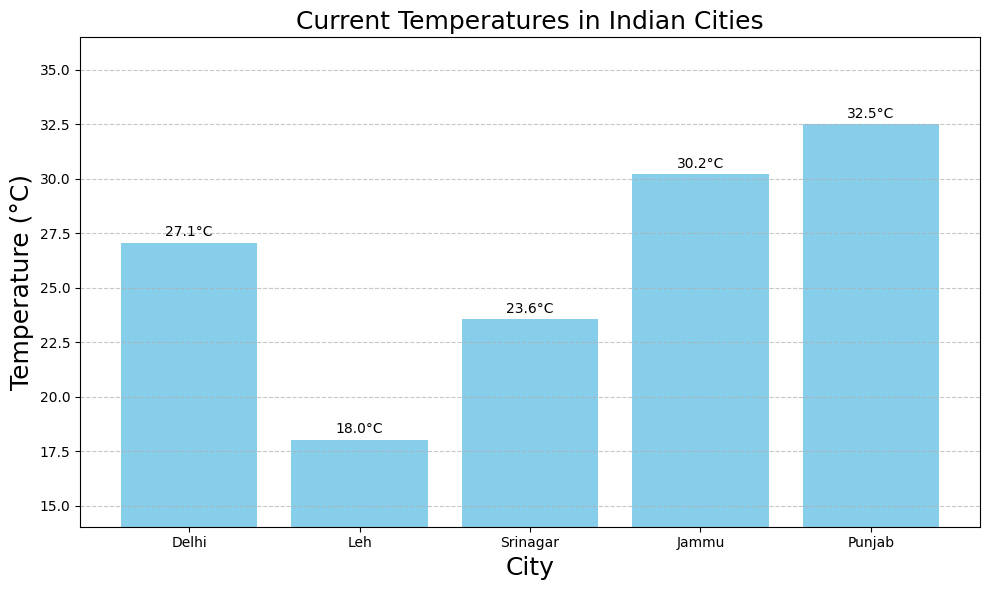

In [165]:
# plot temp
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Temperature (°C)'], color='skyblue')
plt.title('Current Temperatures in Indian Cities', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.ylabel('Temperature (°C)', fontsize=18)
plt.ylim(min(df['Temperature (°C)']) - 4, max(df['Temperature (°C)']) + 4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add temperature values on bars
for i, temp in enumerate(df['Temperature (°C)']):
    plt.text(i, temp + 0.3, f'{temp:.1f}°C', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('temp.png')
plt.show()